In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
covid_filepath = ('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Latest%20Covid-19%20India%20Status.csv')
covid_data = pd.read_csv(covid_filepath)
covid_data.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71
1,Andhra Pradesh,1995669,16341,1965657,13671,0.82,98.50,0.69
2,Arunachal Pradesh,51655,1763,49640,252,3.41,96.10,0.49
3,Assam,581398,8772,567113,5513,1.51,97.54,0.95
4,Bihar,725518,204,715665,9649,0.03,98.64,1.33


In [8]:
covid_data.dtypes

State/UTs               object
Total Cases              int64
Active                   int64
Discharged               int64
Deaths                   int64
Active Ratio (%)       float64
Discharge Ratio (%)    float64
Death Ratio (%)        float64
dtype: object

In [9]:
covid_data.shape

(36, 8)

In [10]:
covid_data.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.968294e+05,10205.972222,8.746090e+05,12014.416667,1.682222,97.052222,1.265000
std,1.303563e+06,30660.005408,1.262310e+06,23205.834381,3.335660,3.239175,0.564464
min,7.549000e+03,1.000000,7.419000e+03,4.000000,0.010000,81.440000,0.040000
25%,6.981775e+04,213.750000,6.598125e+04,803.750000,0.067500,97.150000,0.947500
50%,4.645165e+05,1062.500000,4.546995e+05,5322.500000,0.570000,98.200000,1.320000
75%,9.980822e+05,7369.500000,9.826742e+05,13579.500000,1.337500,98.597500,1.607500
max,6.401213e+06,175695.000000,6.201168e+06,135255.000000,18.190000,99.920000,2.720000


In [11]:
covid_data.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

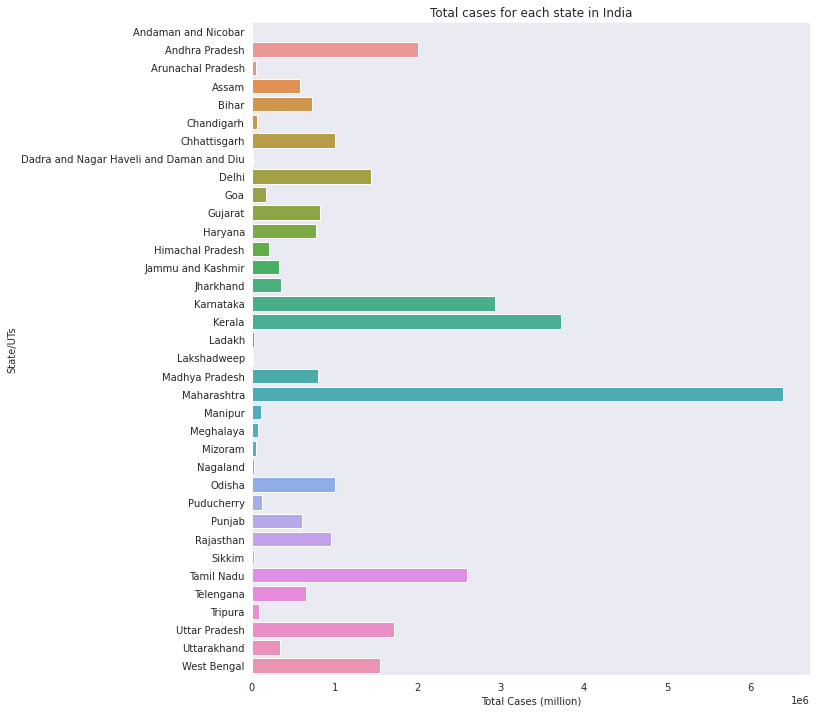

In [12]:
sns.set_style('dark')
plt.figure(figsize = (10, 12))
plt.title('Total cases for each state in India')
sns.barplot(data = covid_data, y = 'State/UTs', x = 'Total Cases')
plt.xlabel('Total Cases (million)')

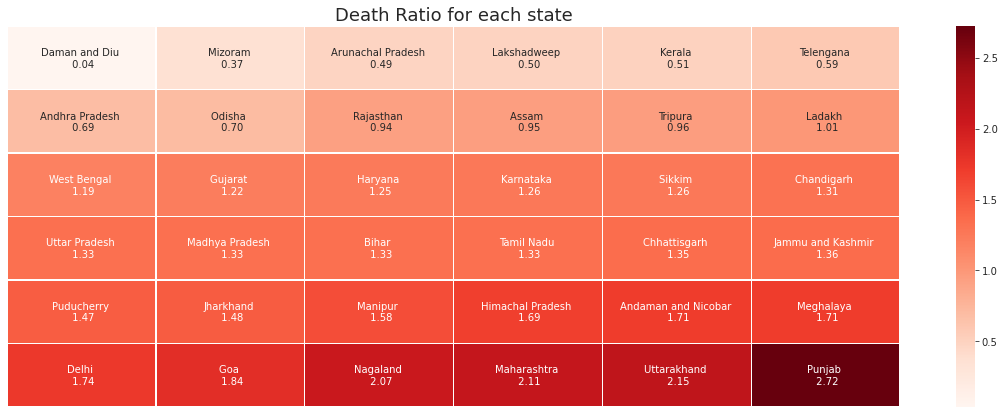

In [13]:
cdheatmap = covid_data.copy()
xcols = [1, 2, 3, 4, 5, 6] * 6
yrows = [1]*6 + [2]*6 + [3]*6 + [4]*6 + [5]*6 + [6]*6 
cdheatmap = cdheatmap.replace('Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu')
cdheatmap = cdheatmap.sort_values(by = 'Death Ratio (%)')
cdheatmap['xcols'] = xcols 
cdheatmap['yrows'] = yrows


state = ((np.asarray(cdheatmap['State/UTs'])).reshape(6,6))
dr = ((np.asarray(cdheatmap['Death Ratio (%)'])).reshape(6,6))
result = cdheatmap.pivot(index = 'yrows', columns = 'xcols', values = 'Death Ratio (%)')
labels = (np.asarray(["{0} \n {1:.2f}".format(region, value)
                     for region, value in zip(state.flatten(),
                                           dr.flatten())])).reshape(6,6)
fig, ax = plt.subplots(figsize=(20,7))
title = 'Death Ratio for each state'
plt.title(title, fontsize = 18)
#plt. ax.title
#plt.set_position(0.5, 1, 0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

sns.heatmap(result, annot = labels, fmt = "", cmap = 'Reds', linewidths = 0.3, ax=ax)
plt.show()

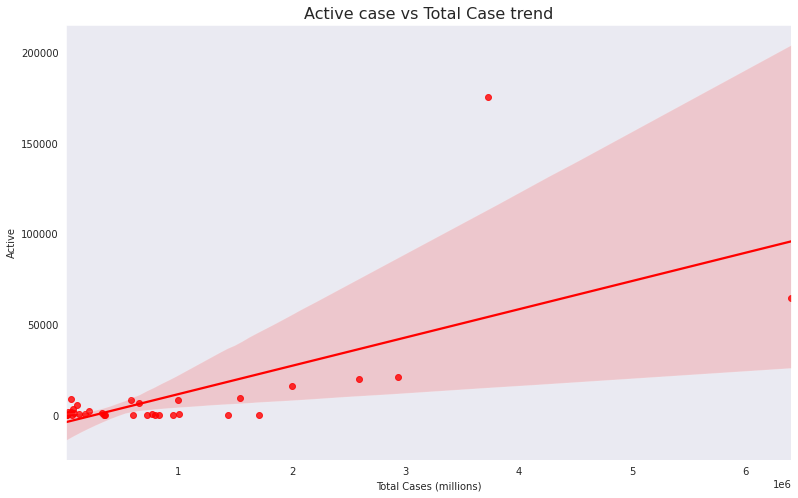

In [14]:
plt.figure(figsize = (13, 8))
plt.title("Active case vs Total Case trend", fontsize = 16)
sns.regplot(data = covid_data, x = 'Total Cases', y = 'Active', color = 'red')
plt.xlabel('Total Cases (millions)')

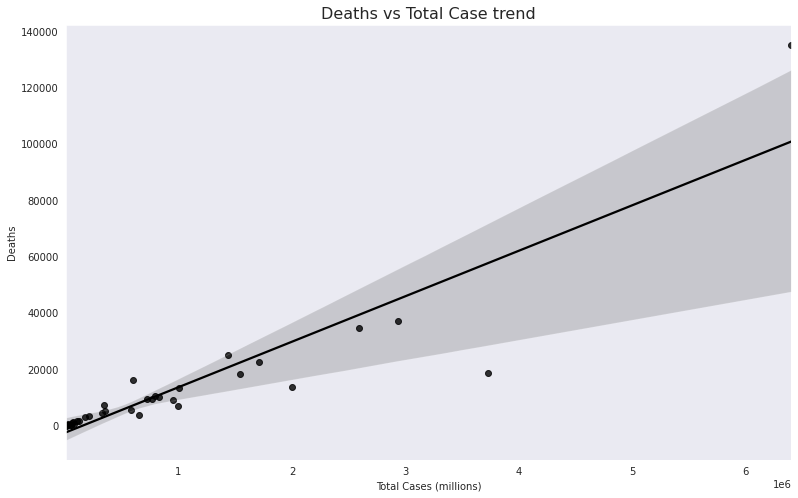

In [15]:
plt.figure(figsize = (13, 8))
plt.title("Deaths vs Total Case trend", fontsize = 16)
sns.regplot(data = covid_data, x = 'Total Cases', y = 'Deaths', color = 'black')
plt.xlabel('Total Cases (millions)')

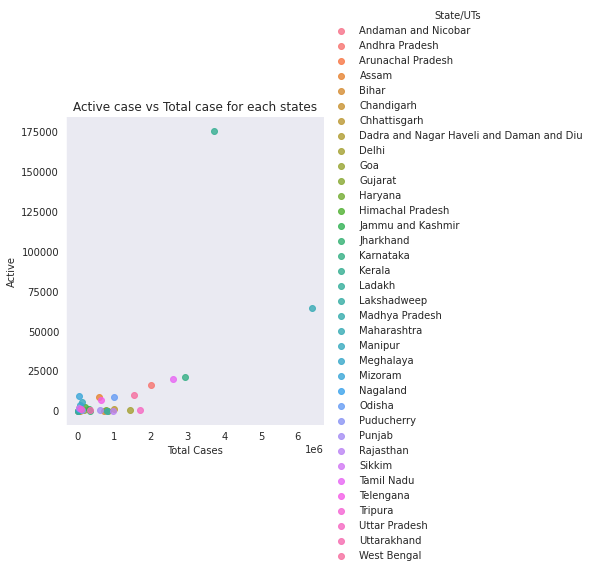

In [16]:
sns.lmplot(data = covid_data, x = 'Total Cases', y = 'Active', hue = 'State/UTs')
plt.title('Active case vs Total case for each states', fontsize = 12)

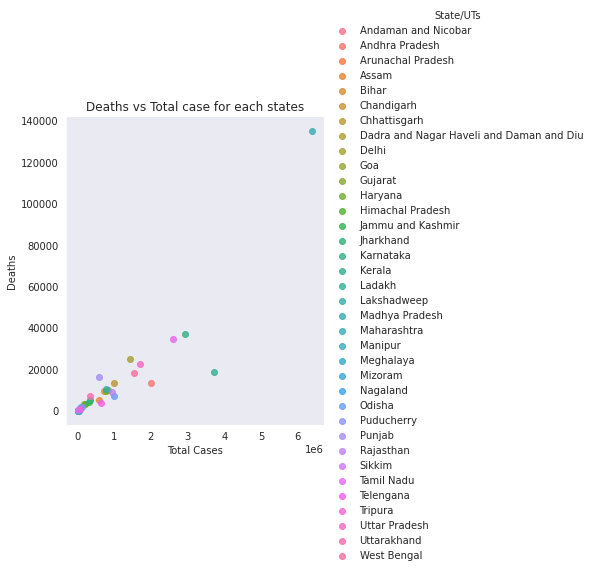

In [17]:
sns.lmplot(data = covid_data, x = 'Total Cases', y = 'Deaths', hue = 'State/UTs')
plt.title('Deaths vs Total case for each states', fontsize = 12)

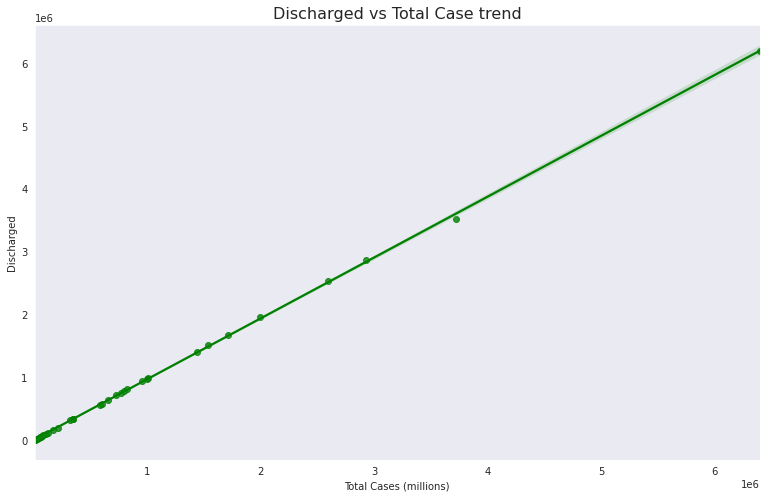

In [18]:
plt.figure(figsize = (13, 8))
plt.title("Discharged vs Total Case trend", fontsize = 16)
sns.regplot(data = covid_data, x = 'Total Cases', y = 'Discharged', color = 'green')
plt.xlabel('Total Cases (millions)')

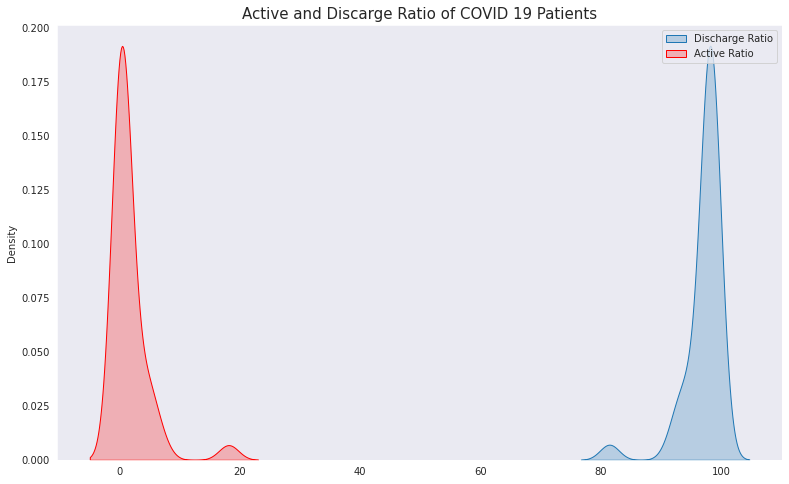

In [19]:
plt.figure(figsize = (13, 8))
sns.kdeplot(data = covid_data['Discharge Ratio (%)'], shade = True, label = 'Discharge Ratio')
sns.kdeplot(data = covid_data['Active Ratio (%)'], shade = True, label = 'Active Ratio', color = 'red')
plt.legend()
plt.xlabel("")
plt.title('Active and Discarge Ratio of COVID 19 Patients', fontsize = 15)

In [20]:
high_total_case = covid_data[covid_data['Total Cases'] == max(covid_data['Total Cases'])]
high_total_case

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
20,Maharashtra,6401213,64790,6201168,135255,1.01,96.87,2.11


In [21]:
low_total_case = covid_data[covid_data['Total Cases'] == min(covid_data['Total Cases'])]
low_total_case

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71


In [22]:
high_active_case = covid_data[covid_data['Active'] == max(covid_data['Active'])]
high_active_case

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
16,Kerala,3724030,175695,3529465,18870,4.72,94.78,0.51


In [23]:
low_active_case = covid_data[covid_data['Active'] == min(covid_data['Active'])]
low_active_case

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71


In [24]:
high_dis_case = covid_data[covid_data['Discharged'] == max(covid_data['Discharged'])]
high_dis_case

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
20,Maharashtra,6401213,64790,6201168,135255,1.01,96.87,2.11


In [25]:
low_dis_case = covid_data[covid_data['Discharged'] == min(covid_data['Discharged'])]
low_dis_case

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71


In [26]:
high_dr_case = covid_data[covid_data['Deaths'] == max(covid_data['Deaths'])]
high_dr_case

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
20,Maharashtra,6401213,64790,6201168,135255,1.01,96.87,2.11


In [27]:
low_dr_case = covid_data[covid_data['Deaths'] == min(covid_data['Deaths'])]
low_dr_case

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
7,Dadra and Nagar Haveli and Daman and Diu,10657,4,10649,4,0.04,99.92,0.04
